The notebook show how one could buy the dips regularly to gain more profit percentage instead of just dollar cost averaging on the 1st of every month. In this algorithm, we use the popular three moving averages to determine when to buy and sell to make a profit. The sell part is also shown initially but only for illustration as we are only concerned later about the buy part. Dollar cost averaging(DCA) is still very effective and best passive way of investment. This notebook is just for learning purposes and not an actual recommendation for buying stocks.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

We choose the bitcoin to see if buying the dips recommended by the algorithm fares better than regular monthly DCA. The year 2020 is taken for example.

In [62]:
stock = 'BTC-USD'
start = '2020-01-02'
end = '2020-12-31'

In [63]:
df = yf.download(stock,start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664996
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481031
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271274
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074094
...,...,...,...,...,...,...
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742892


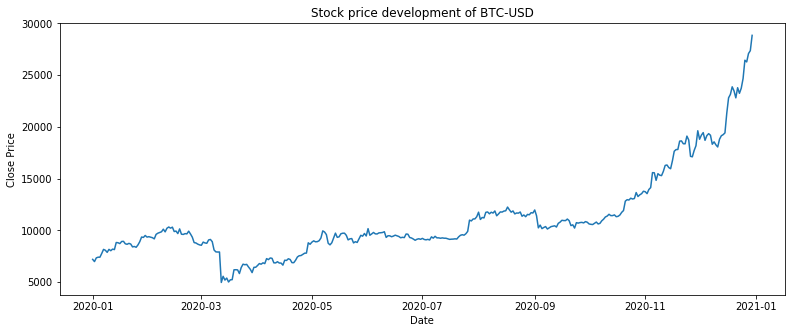

In [64]:
plt.figure(figsize=(13,5))
plt.title('Stock price development of {}'.format(stock))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df.index.values,df.Close.values)
plt.show()

Claculate three moving avgs

In [65]:
#Calc three moving avgs
df['Short'] = df.Close.ewm(span=13,adjust=False).mean()
df['Middle'] = df.Close.ewm(span=19,adjust=False).mean()
df['Long'] = df.Close.ewm(span=30,adjust=False).mean()

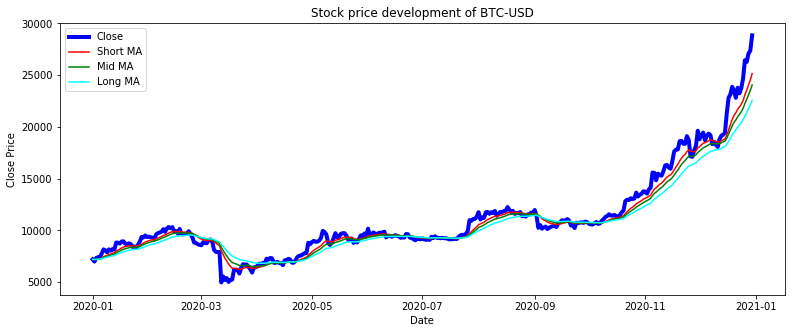

In [66]:
plt.figure(figsize=(13,5))
plt.title('Stock price development of {}'.format(stock))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df.index.values,df.Close.values,label='Close',color='blue',linewidth=4)
plt.plot(df.index.values,df['Short'].values, label='Short MA',color='red')
plt.plot(df.index.values,df['Middle'].values,label='Mid MA',color ='green')
plt.plot(df.index.values,df['Long'].values, label='Long MA',color='cyan')
plt.legend()
plt.show()

In [67]:
def buy_sell(df):
    buy = []
    sell = []
    long_flag = False
    short_flag = False
    
    for i in range(0,len(df.values)):
        if(df['Middle'][i] < df['Long'][i] and df['Short'][i] < df['Middle'][i] and long_flag == False and short_flag == False):
            buy.append(df['Close'][i])
            sell.append(np.nan)
            short_flag=True
        elif(short_flag==True and df['Short'][i] > df['Middle'][i]):
            sell.append(df['Close'][i])
            buy.append(np.nan)
            short_flag=False
        elif(df['Middle'][i] > df['Long'][i] and df['Short'][i] > df['Middle'][i] and long_flag == False and short_flag == False):
            buy.append(df['Close'][i])
            sell.append(np.nan)
            long_flag=True
        elif(long_flag==True and df['Short'][i] < df['Middle'][i]):
            sell.append(df['Close'][i])
            buy.append(np.nan)
            long_flag=False
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    
    return buy, sell

Calculate buy and sell points.

In [68]:
df['Buy'],df['Sell'] = buy_sell(df)

Plotting the buy and sell recommendations, for illustration purposes.

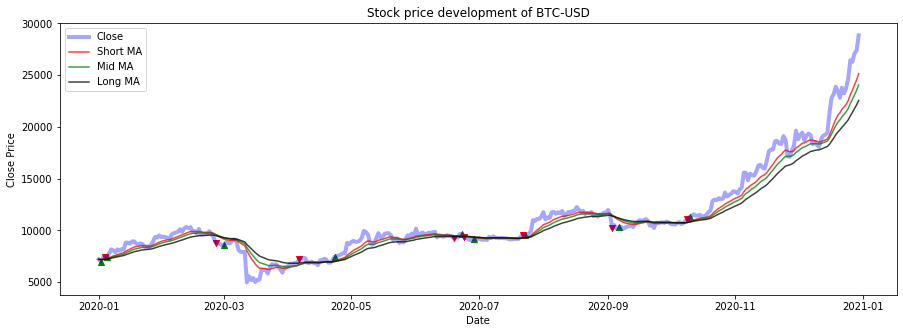

In [69]:
plt.figure(figsize=(15,5))
plt.title('Stock price development of {}'.format(stock))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df.index.values,df.Close.values,label='Close',color='blue',linewidth=4,alpha=0.35)
plt.plot(df.index.values,df['Short'].values, label='Short MA',color='red',alpha=0.75)
plt.plot(df.index.values,df['Middle'].values,label='Mid MA',color ='green',alpha=0.75)
plt.plot(df.index.values,df['Long'].values, label='Long MA',color='black',alpha=0.75)
plt.scatter(df.index.values,df['Buy'].values,color ='green',marker='^',alpha=1)
plt.scatter(df.index.values,df['Sell'].values,color ='red',marker='v',alpha=1)
plt.legend()
plt.show()

In [70]:
buys = np.array(50/df.Buy.values)
# removing nan values that were added in the previous step for illustration og buy and sell.
nan_array = np.isnan(buys) 
not_nan_array = ~ nan_array
units_algo = buys[not_nan_array]
print("The total no of units of bitcoins we bought with the algorthm recommendations in 2020: {}".format(np.sum(units_algo)))
print("The no of times we bought bitcoins with the algorthm recommendations in 2020: {}".format(len(units_algo)))
final_algo = np.sum(units_algo)*df.tail(1).Close.iloc[0]
print("The total worth of the bitcoins we bought with the algorthm recommendations at the close of 2020: {}".format(final_algo))

The total no of units of bitcoins we bought with the algorthm recommendations in 2020: 0.051614281465280874
The no of times we bought bitcoins with the algorthm recommendations in 2020: 9
The total worth of the bitcoins we bought with the algorthm recommendations at the close of 2020: 1488.605072320722


In [71]:
df_dca = df.groupby(df.index.to_period('m')).head(1)
close_vals = np.array(df_dca.Close.values)
units_dca = 50/close_vals
print("The total no of units of bitcoins we bought with DCA in 2020: {}".format(np.sum(units_dca)))
print("The no of times we bought bitcoins with DCA in 2020: {}".format(len(units_dca)))
final_dca = np.sum(units_dca)*df.tail(1).Close.iloc[0]
print("The total worth of the bitcoins we bought with DCA at the close of 2020: {}".format(final_dca))

The total no of units of bitcoins we bought with DCA in 2020: 0.0610853829214648
The no of times we bought bitcoins with DCA in 2020: 12
The total worth of the bitcoins we bought with DCA at the close of 2020: 1761.7606654606418


Therefore we bought more units of bitcoins in 2020 with DCA because our algorithm did not recommend a buy in the last 2 months approx. But we are concerned about the profit percentage alone and not the amount of bitcoins. Lets calculate the profit percentage of both these scenarios and see which had better returns at the end of the year. 

In [72]:
print("Profit percentage/ Returns in % at the end of 2020 with algorithm recommendation: {}".format(final_algo/(len(units_algo)*50) * 100))
print("Profit percentage/ Returns in % at the end of 2020 with DCA: {}".format(final_dca/(len(units_dca)*50) * 100))

Profit percentage/ Returns in % at the end of 2020 with algorithm recommendation: 330.8011271823827
Profit percentage/ Returns in % at the end of 2020 with DCA: 293.62677757677363


The algorithm recommended buying had better returns than Dollar cost averaging.But on a long-term basis, DCA would outperform active investing.